# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?&units=metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | sinnamary
Processing Record 3 of Set 1 | lorengau
Processing Record 4 of Set 1 | swansea
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | westport
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | bereznik
Processing Record 10 of Set 1 | touros
Processing Record 11 of Set 1 | buala
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | tongchuan
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | wasilla
Processing Record 19 of Set 1 | isangel
Processing Record 20 of Set 1 | faya
Processing Record 21 of Set 1 | ostrovnoy
Processing Record 22 of Set 1 | kodiak
Processing Record 23 

Processing Record 40 of Set 4 | tongren
Processing Record 41 of Set 4 | evensk
Processing Record 42 of Set 4 | vostok
Processing Record 43 of Set 4 | lahaina
Processing Record 44 of Set 4 | oron
Processing Record 45 of Set 4 | bourges
Processing Record 46 of Set 4 | saint george
Processing Record 47 of Set 4 | oranjemund
Processing Record 48 of Set 4 | myaundzha
Processing Record 49 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 0 of Set 5 | mount gambier
Processing Record 1 of Set 5 | nouakchott
Processing Record 2 of Set 5 | teguise
Processing Record 3 of Set 5 | sarangani
Processing Record 4 of Set 5 | aklavik
Processing Record 5 of Set 5 | wakkanai
Processing Record 6 of Set 5 | show low
Processing Record 7 of Set 5 | kamaishi
Processing Record 8 of Set 5 | cherskiy
Processing Record 9 of Set 5 | chor
Processing Record 10 of Set 5 | kenai
Processing Record 11 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 5 | raga
Processing Rec

Processing Record 25 of Set 8 | udachnyy
Processing Record 26 of Set 8 | srednekolymsk
Processing Record 27 of Set 8 | ituni
City not found. Skipping...
Processing Record 28 of Set 8 | yubari
Processing Record 29 of Set 8 | jawhar
Processing Record 30 of Set 8 | olafsvik
Processing Record 31 of Set 8 | meulaboh
Processing Record 32 of Set 8 | santa marta
Processing Record 33 of Set 8 | yumen
Processing Record 34 of Set 8 | novoye atlashevo
City not found. Skipping...
Processing Record 35 of Set 8 | qandala
Processing Record 36 of Set 8 | palana
Processing Record 37 of Set 8 | los llanos de aridane
Processing Record 38 of Set 8 | nome
Processing Record 39 of Set 8 | north bend
Processing Record 40 of Set 8 | alghero
Processing Record 41 of Set 8 | belyy yar
Processing Record 42 of Set 8 | veraval
Processing Record 43 of Set 8 | lagoa
Processing Record 44 of Set 8 | kanniyakumari
Processing Record 45 of Set 8 | pangody
Processing Record 46 of Set 8 | eldorado
Processing Record 47 of Set 

Processing Record 12 of Set 12 | kuznetsk
Processing Record 13 of Set 12 | nelson bay
Processing Record 14 of Set 12 | mareeba
Processing Record 15 of Set 12 | umaria
Processing Record 16 of Set 12 | te anau
Processing Record 17 of Set 12 | srivardhan
Processing Record 18 of Set 12 | sompeta
Processing Record 19 of Set 12 | linguere
Processing Record 20 of Set 12 | mehamn
Processing Record 21 of Set 12 | navahrudak
Processing Record 22 of Set 12 | erechim
Processing Record 23 of Set 12 | keningau
Processing Record 24 of Set 12 | tucumcari
Processing Record 25 of Set 12 | nigel
Processing Record 26 of Set 12 | bilma
Processing Record 27 of Set 12 | george town
Processing Record 28 of Set 12 | latung
Processing Record 29 of Set 12 | minsk
Processing Record 30 of Set 12 | jimo
Processing Record 31 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 32 of Set 12 | samarai
Processing Record 33 of Set 12 | fukuma
Processing Record 34 of Set 12 | arlit
Processing Record 35

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,10.06,62,75,6.69,CL,1673710175
1,sinnamary,5.3833,-52.9500,25.61,86,96,5.07,GF,1673710459
2,lorengau,-2.0226,147.2712,27.63,78,100,3.88,PG,1673710460
3,swansea,51.6208,-3.9432,7.93,75,100,3.13,GB,1673710460
4,bluff,-46.6000,168.3333,11.22,82,9,2.23,NZ,1673710461


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,10.06,62,75,6.69,CL,1673710175
1,sinnamary,5.3833,-52.9500,25.61,86,96,5.07,GF,1673710459
2,lorengau,-2.0226,147.2712,27.63,78,100,3.88,PG,1673710460
3,swansea,51.6208,-3.9432,7.93,75,100,3.13,GB,1673710460
4,bluff,-46.6000,168.3333,11.22,82,9,2.23,NZ,1673710461


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

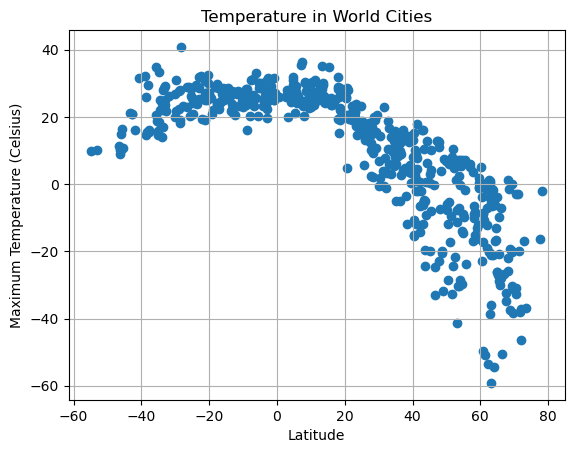

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Maximum Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

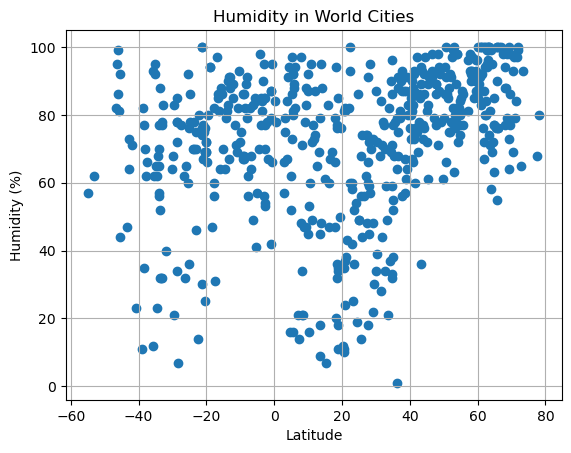

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

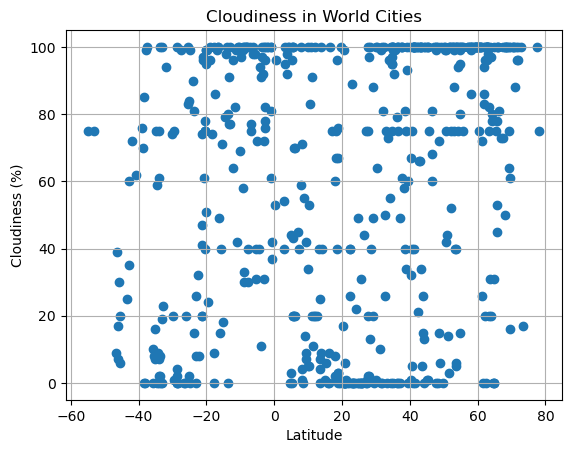

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

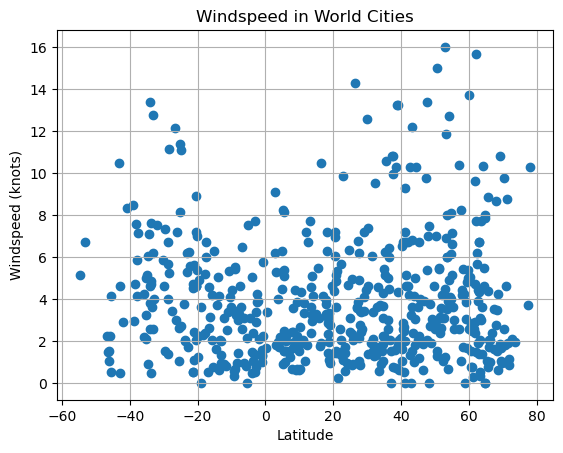

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Windspeed in World Cities")
plt.ylabel("Windspeed (knots)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots

def lin_plot(x_values, y_values, hemi, y_label, coord):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, color = "red")

    # Label plot and annotate the line equation
    plt.title(f"Latitude vs {y_label} of {hemi}")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_label}")
    plt.annotate(line_eq, coord, fontsize=15, color="red")

    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,sinnamary,5.3833,-52.9500,25.61,86,96,5.07,GF,1673710459
3,swansea,51.6208,-3.9432,7.93,75,100,3.13,GB,1673710460
6,westport,41.1415,-73.3579,1.52,73,100,7.20,US,1673710308
8,bereznik,62.8551,42.7072,-2.23,95,100,3.88,RU,1673710462
11,ribeira grande,38.5167,-28.7000,14.22,67,40,10.29,PT,1673710464


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,10.06,62,75,6.69,CL,1673710175
2,lorengau,-2.0226,147.2712,27.63,78,100,3.88,PG,1673710460
4,bluff,-46.6000,168.3333,11.22,82,9,2.23,NZ,1673710461
5,atuona,-9.8000,-139.0333,25.39,75,97,4.44,PF,1673710461
7,ushuaia,-54.8000,-68.3000,9.81,57,75,5.14,AR,1673710314


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6914717945807566


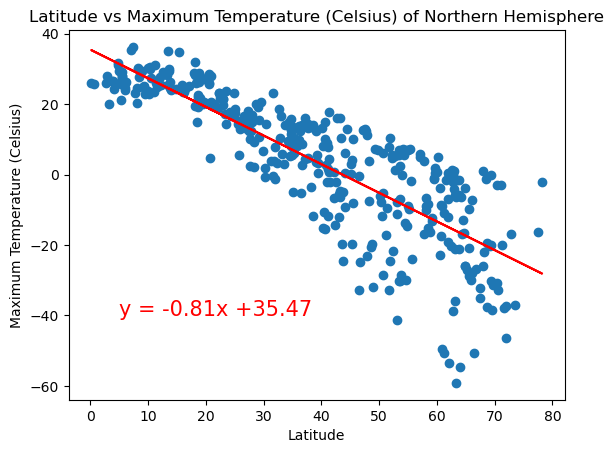

In [21]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
hemi = "Northern Hemisphere"
y_label = "Maximum Temperature (Celsius)"
coord = (5, -40)

lin_plot(x_values, y_values, hemi, y_label, coord)

The r-value is: 0.23445343791414017


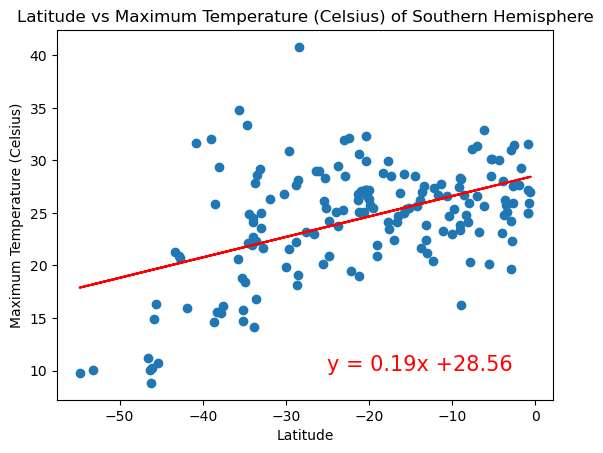

In [22]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
hemi = "Southern Hemisphere"
y_label = "Maximum Temperature (Celsius)"
coord = (-25, 10)

lin_plot(x_values, y_values, hemi, y_label, coord)

**Discussion about the linear relationship:** 
For both hemipheres, the further a city is from the equator, the colder the Maximum Temperature is.
In the northern hemisphere, this means the higher the latitude, the colder the maximum temperature.
In the sourthern hemiphere, this means the lower the latitude, the colder the maximum temperature.
For the current data, the r-values indicate the northern hemisphere regression equation is a good fit for the data, but the southern is not.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2246706315763699


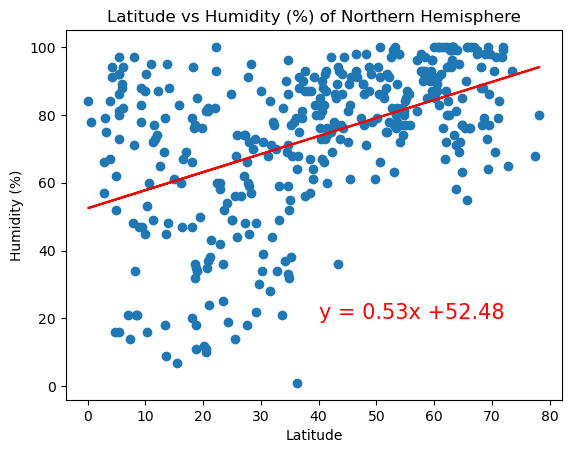

In [23]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
hemi = "Northern Hemisphere"
y_label = "Humidity (%)"
coord = (40,20)

lin_plot(x_values, y_values, hemi, y_label, coord)

The r-value is: 0.05525681866378566


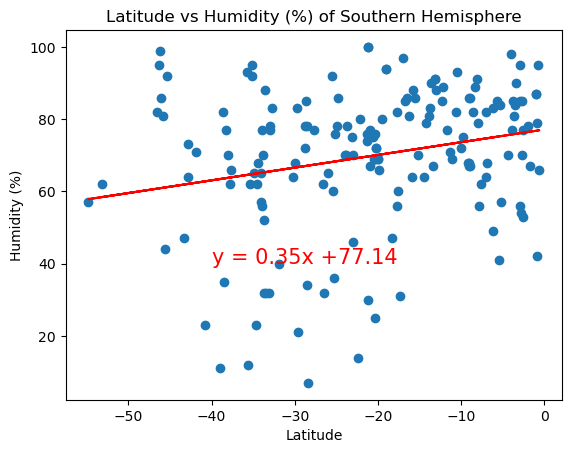

In [24]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
hemi = "Southern Hemisphere"
y_label = "Humidity (%)"
coord = (-40,40)

lin_plot(x_values, y_values, hemi, y_label, coord)

**Discussion about the linear relationship:** A linear relationship between humidity and latitude is not a good fit for either hemisphere. There appears to be a slight rise in humidity as latitude increases, but the r-values are too low to have confidence in this relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1487882159211568


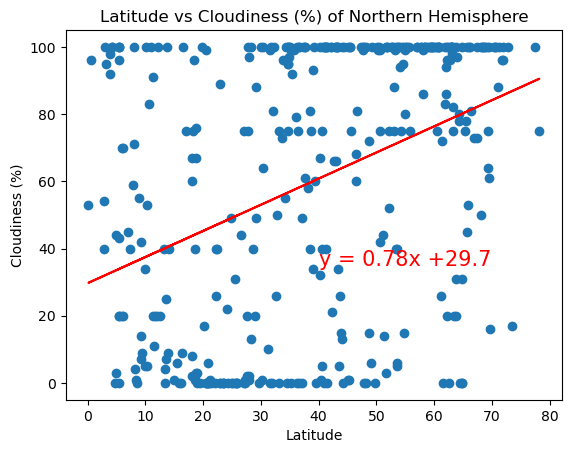

In [27]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
hemi = "Northern Hemisphere"
y_label = "Cloudiness (%)"
coord = (40,35)

lin_plot(x_values, y_values, hemi, y_label, coord)

The r-value is: 0.1798438811376199


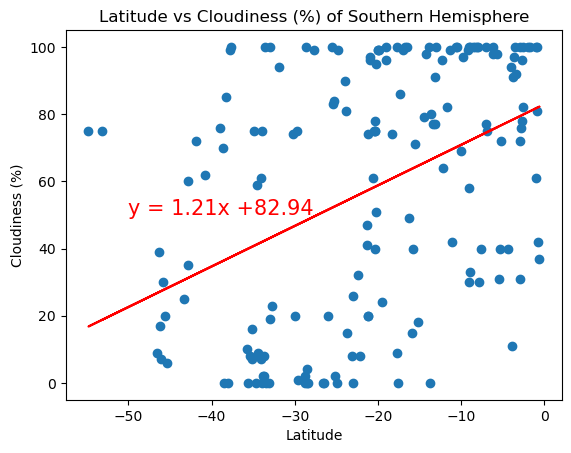

In [28]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
hemi = "Southern Hemisphere"
y_label = "Cloudiness (%)"
coord = (-50,50)

lin_plot(x_values, y_values, hemi, y_label, coord)

**Discussion about the linear relationship:** A linear relationship between humidity and latitude is not a good fit for either hemisphere. The r-values are too low to have confidence in this relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.010034917887335057


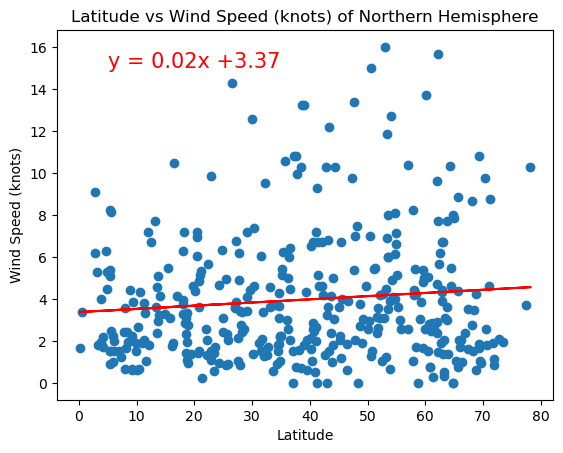

In [31]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
hemi = "Northern Hemisphere"
y_label = "Wind Speed (knots)"
coord = (5,15)

lin_plot(x_values, y_values, hemi, y_label, coord)

The r-value is: 0.08513137855451959


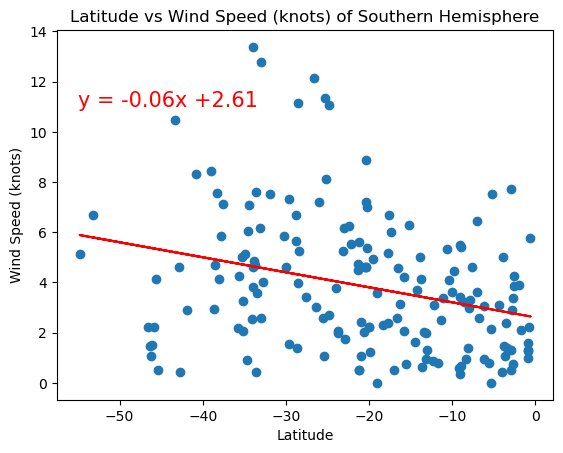

In [33]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
hemi = "Southern Hemisphere"
y_label = "Wind Speed (knots)"
coord = (-55,11)

lin_plot(x_values, y_values, hemi, y_label, coord)

**Discussion about the linear relationship:** A linear relationship between wind speed and latitude is not a good fit for either hemisphere. There appears to be a slight rise in wind speed the further a city is from the equator, but the r-values are too low to have confidence in this relationship.